In [ ]:
## Imports
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import nltk
from nltk.corpus import stopwords
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
## Function declarations
# Function to calculate the SSE of a specific clustering
def calculate_SSE(df):
    centroid = df.mean(axis=0)
    SSE = df.apply(lambda x: x.sub(centroid).dot(x.sub(centroid)), axis=1)
    return SSE.sum()


# Function to scale a dataset
def scale_data(df):
    max = df.apply(lambda x: x.max(), axis=0)
    min = df.apply(lambda x: x.min(), axis=0)
    for i in range(df.shape[1]):
        df.iloc[slice(None), i] = (df.iloc[slice(None), i] - min.iloc[i]) / (max.iloc[i] - min.iloc[i])
    return df


# Function to print output to the console
def output(clusters, data_file, scale, n_iterations):
    n_samples = clusters.shape[0]
    n_features = clusters.shape[1]
    n_clusters = clusters['cluster'].nunique()
    count = clusters.groupby('cluster').count()
    count = count['SepalLengthCm'].rename('count')
    SSE = clusters.groupby('cluster').apply(calculate_SSE)
    
    print('The dataset used to test my implementation is: ' + data_file + '\n')
    print('The data has been scaled? ' + str(scale) + '\n')
    print('Number of cluster chosen to cluster this dataset is: ' + str(n_clusters) + '\n')
    print('Number of max iterations to cluster this dataset is: ' + str(n_iterations) + '\n')
    print('After applying the clustering technique to the dataset, a sample of the clusters can be seen below: ')
    print(clusters.sample(n=8))
    print('\nThe number of instances in each cluster is shown below: ')
    print(count)
    print('\nThe intracluster SSE is: ')
    print(SSE)
    print('\nThe total SSE is: ' + "{:.2f}".format(SSE.sum()))
    

In [28]:
## Basic K-means on Iris_student.csv

# Define constants
MAX_ITER = 300
NUM_TRIALS = 5
INITIAL = 'random'
scale = True
k = 5

# Read data
data_file = 'data/Iris_student.csv'
raw_data = pd.read_csv(data_file)

# Data preprocessing
clean_data = raw_data.iloc[slice(None), 1:].copy() # remove the class feature
# Scale option
if scale:
    clean_data = scale_data(clean_data)

# Conduct k-means
k_means = KMeans(n_clusters=k, init=INITIAL, max_iter=MAX_ITER)
Iris_res = k_means.fit_predict(clean_data)
k_clusters = pd.concat([clean_data, pd.DataFrame(Iris_res, columns=['cluster'])], axis=1).sort_values('cluster')
output(k_clusters, data_file, scale, MAX_ITER)

The dataset used to test my implementation is: data/Iris_student.csv

The data has been scaled? True

Number of cluster chosen to cluster this dataset is: 5

Number of max iterations to cluster this dataset is: 300

After applying the clustering technique to the dataset, a sample of the clusters can be seen below: 
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  cluster
113       0.388889      0.208333       0.677966      0.791667        1
25        0.194444      0.416667       0.101695      0.041667        0
129       0.805556      0.416667       0.813559      0.625000        4
118       0.944444      0.250000       1.000000      0.916667        4
71        0.500000      0.333333       0.508475      0.500000        2
57        0.166667      0.166667       0.389831      0.375000        2
146       0.555556      0.208333       0.677966      0.750000        1
134       0.500000      0.250000       0.779661      0.541667        1

The number of instances in each cluster is 

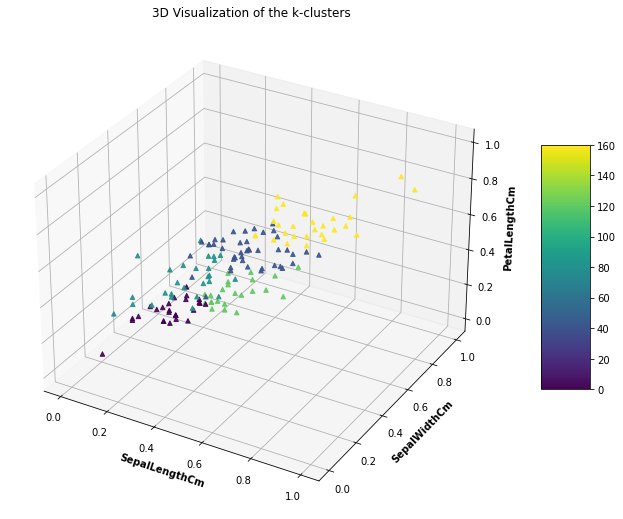

In [29]:
## Visualize the clusters using 3 features
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

my_cmap = plt.get_cmap('viridis')
sctt = ax.scatter3D(k_clusters['SepalLengthCm'], 
                    k_clusters['SepalWidthCm'], 
                    k_clusters['PetalLengthCm'], 
                    alpha = 0.9,
                    c = k_clusters['cluster'] * 40,
                    cmap = my_cmap,
                    marker ='^')

plt.title("3D Visualization of the k-clusters")
ax.set_xlabel('SepalLengthCm', fontweight ='bold')
ax.set_ylabel('SepalWidthCm', fontweight ='bold')
ax.set_zlabel('PetalLengthCm', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.show()

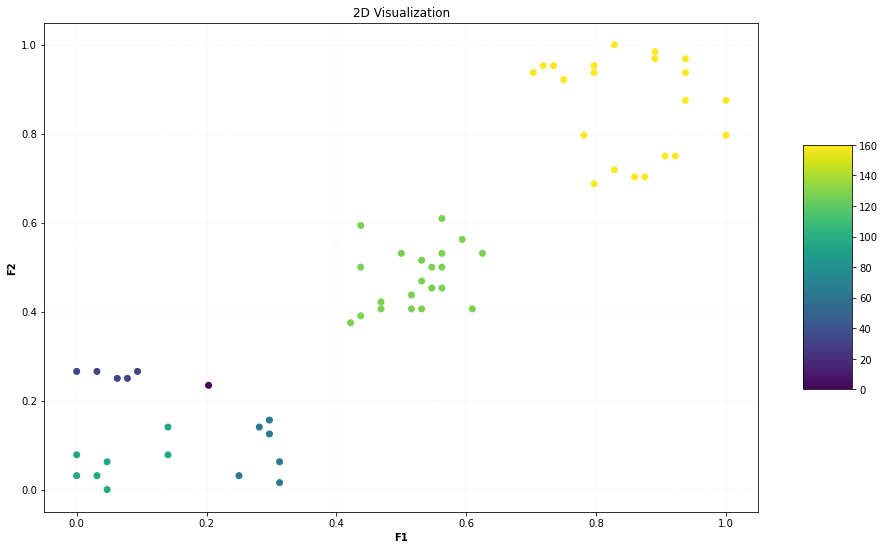

In [35]:
## Test DBSCAN using separated_2d.csv

data_file2 = 'data/separated_2d.csv'
raw_data2 = pd.read_csv(data_file2)

# Data preprocessing
clean_data2 = raw_data2.iloc[slice(None), 1:].copy() # remove class label
# Scale option
if scale:
    clean_data2 = scale_data(clean_data2)

# Fit DBSCAN
clustering = DBSCAN(eps=0.1, min_samples=3).fit_predict(clean_data2)
cluster5 = pd.concat([clean_data2, pd.DataFrame(clustering, columns=['cluster'])], axis=1) 

# Visualize using 2d graph
fig = plt.figure(figsize = (16, 9))
ax = plt.axes()
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
my_cmap = plt.get_cmap('viridis')
scat = plt.scatter(cluster5['F1'], cluster5['F2'], c=cluster5['cluster'] * 40, marker=None, cmap=my_cmap)
plt.title("2D Visualization")
ax.set_xlabel('F1', fontweight ='bold')
ax.set_ylabel('F2', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.show()

In [77]:
## Cluster my own dataset

data_file3 = 'data/top50.csv'
raw_data3 = pd.read_csv(data_file3)

# Data preprocessing
clean_data3 = raw_data3[['Genre', 'Beats.Per.Minute', 'Energy', 'Danceability', 
                         'Loudness..dB..', 'Liveness', 'Valence.', 'Length.', 
                         'Acousticness..', 'Speechiness.', 'Popularity']]
genre = clean_data3['Genre'].map({'canadian pop': 1, 'reggaeton flow': 2, 'dance pop': 1,
                                 'pop': 1, 'dfw rap': 3, 'trap music': 4, 'country rap': 3,
                                 'electropop': 1, 'reggaeton': 2, 'panamanian pop': 1, 
                                 'canadian hip hop': 3, 'latin': 5, 'escape room': 2, 
                                 'pop house': 1, 'australian pop': 1, 'edm': 4, 
                                 'atl hip hop': 3, 'big room': 2, 'boy band': 2,
                                 'r&b en espanol': 2, 'brostep': 4})
del clean_data3['Genre']

# Scale option
if scale:
    clean_data3 = scale_data(clean_data3)

# Apply k-means to cluster
k_means = KMeans(n_clusters=5, init='k-means++', max_iter=MAX_ITER)
cluster = k_means.fit_predict(clean_data3)
k_clusters = pd.concat([clean_data3, pd.DataFrame(cluster, columns=['cluster'])], axis=1)


/Users/FhatWAuck/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


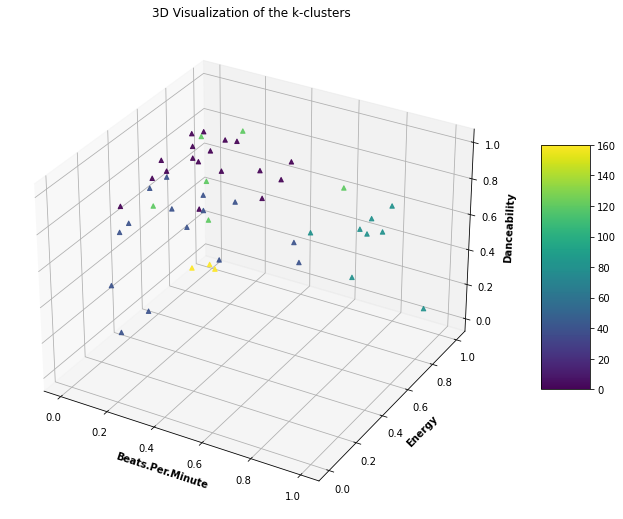

In [79]:
# Visualization
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

my_cmap = plt.get_cmap('viridis')
sctt = ax.scatter3D(k_clusters['Beats.Per.Minute'], 
                    k_clusters['Energy'], 
                    k_clusters['Danceability'], 
                    alpha = 0.9,
                    c = k_clusters['cluster'] * 40,
                    cmap = my_cmap,
                    marker ='^')

plt.title("3D Visualization of the k-clusters")
ax.set_xlabel('Beats.Per.Minute', fontweight ='bold')
ax.set_ylabel('Energy', fontweight ='bold')
ax.set_zlabel('Danceability', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.show()

The correlation graph is calculated as below


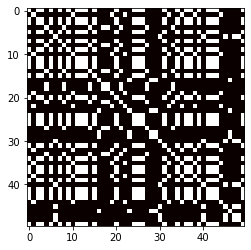

In [80]:
# Correlation
k_clusters = pd.concat([clean_data3, genre], axis=1)
sorted_clusters = k_clusters.sort_values('Genre')
n_samples = sorted_clusters.shape[0]
corr = pd.DataFrame(np.zeros((n_samples, n_samples)), dtype=np.int8)
for i in range(n_samples):
    for j in range(n_samples):
        if genre[i] == genre[j]:
            corr.iloc[i][[j]] = 1
        else:
            corr.iloc[i][[j]] = 0
print('The correlation graph is calculated as below')
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.show()

In [182]:
## Textual clustering using FIFA dataset

# Data read
data_file4 = 'data/FIFA.csv'
raw_data4 = pd.read_csv(data_file4)
raw_data4 = raw_data4[raw_data4['lang'] == 'en']

# Sample from entire dataset
raw_data4 = raw_data4.sample(n=2000, random_state=1)

# Data Preprocessing 
text_only = raw_data4[['Orig_Tweet']]

# Remove URL
text_only.loc[:, 'Orig_Tweet'] = text_only['Orig_Tweet'].apply(lambda x: re.sub(r'http\S+', '', x))
# Remove Capital letter
text_only.loc[:, 'Orig_Tweet'] = text_only['Orig_Tweet'].apply(lambda x: x.lower())
# Remove digits
text_only.loc[:, 'Orig_Tweet'] = text_only['Orig_Tweet'].apply(lambda x: re.sub(' \d+', ' ', x))
# Remove punctuations
text_only.loc[:, 'Orig_Tweet'] = text_only['Orig_Tweet'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
# Remove stopwords
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
stop_words = set(stopwords.words('english'))
stop_words.add('subject')
stop_words.add('http')
text_only.loc[:, 'Orig_Tweet'] = text_only['Orig_Tweet'].apply(lambda x: remove_stopwords(x))

# Actual clustering
vectorizer = TfidfVectorizer(stop_words='english')
text_list = text_only['Orig_Tweet'].to_list()
X = vectorizer.fit_transform(text_list)

model = KMeans(n_clusters=50, init='k-means++', max_iter=200, n_init=1)
result = pd.Series(model.fit_predict(X), index=text_only.index, name='cluster')
result_comp = pd.concat([text_only, result], axis=1)

In [194]:
# View clusters
cluster_1 = result_comp[result_comp['cluster'] == 1]
print(cluster_1)

In [192]:
# Show frequency
idf = vectorizer.idf_
frequency = pd.Series(dict(zip(vectorizer.get_feature_names(), idf)), name='frequency')
frequency.sort_values().head(50)

worldcup           1.173663
rt                 1.205681
france             2.829961
fifaworldcup       2.874555
fra                3.216907
croatia            3.402905
world              3.538807
final              3.617796
congratulations    3.624669
cup                3.718600
england            3.741590
fifa               3.789218
team               3.789218
win                3.874015
cro                3.874015
eng                3.891872
russia             3.900922
worldcupfinal      3.996232
player             4.101593
fraarg             4.147055
messi              4.206953
best               4.270669
winning            4.283914
football           4.283914
mbappe             4.310943
african            4.324736
game               4.338722
time               4.352907
match              4.381895
fracro             4.427015
fifastadiumdj      4.458268
argentina          4.458268
frabel             4.458268
like               4.458268
play               4.540959
bel                4